# Lip Reading Project 
@author : Hatem Trigui 

In [16]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np
import os

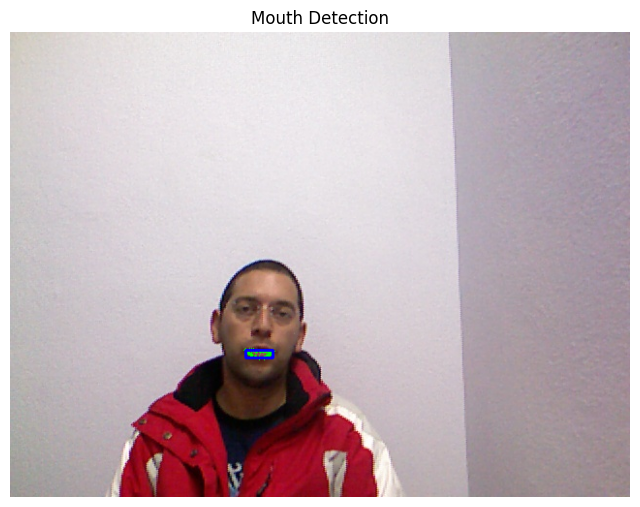

In [1]:
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, refine_landmarks=True)

def visualize_mouth_detection(image_path):
    # Load and prepare the image
    image = cv2.imread(image_path)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Detect facial landmarks
    results = face_mesh.process(rgb_image)
    
    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            # Define mouth landmarks indices
            mouth_landmarks_indices = [
                61, 146, 91, 181, 84, 17, 314, 405, 321, 375, 291, 308,
                324, 318, 402, 317, 14, 87, 178, 88, 95
            ]
            h, w, _ = rgb_image.shape
            
            # Extract and draw the mouth landmarks
            for idx in mouth_landmarks_indices:
                x = int(face_landmarks.landmark[idx].x * w)
                y = int(face_landmarks.landmark[idx].y * h)
                cv2.circle(image, (x, y), 2, (0, 255, 0), -1)
            
            # Draw the bounding box for the mouth region
            mouth_coords = [(int(face_landmarks.landmark[idx].x * w), int(face_landmarks.landmark[idx].y * h)) for idx in mouth_landmarks_indices]
            x_min = min([coord[0] for coord in mouth_coords])
            y_min = min([coord[1] for coord in mouth_coords])
            x_max = max([coord[0] for coord in mouth_coords])
            y_max = max([coord[1] for coord in mouth_coords])
            
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
    
    # Display the image with mouth detection
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Mouth Detection")
    plt.show()

# Test the function with a sample image
sample_image_path = "C:\\Users\\la7tim\\Downloads\\MIRACL-VC1_all_in_one\\M07\\phrases\\09\\10\\color_010.jpg" 
visualize_mouth_detection(sample_image_path)

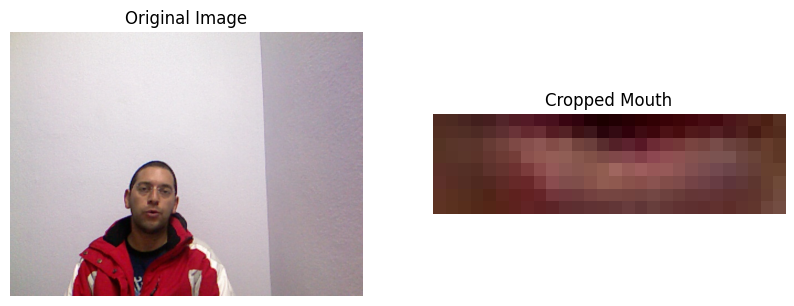

In [27]:


# Initialize Mediapipe Face Mesh model
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5)

def detect_and_crop_mouth(image):
    # Convert image to RGB (Mediapipe expects RGB)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Process the image to detect facial landmarks
    results = face_mesh.process(image_rgb)
    
    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            # The mouth landmarks indices from Mediapipe face mesh
            mouth_indices = [
                61, 146, 91, 181, 84, 17, 314, 405, 321, 375, 291, 308,
                324, 318, 402, 317, 14, 87, 178, 88, 95
            ]
            
            # Get the coordinates of the mouth landmarks
            mouth_points = [(int(face_landmarks.landmark[i].x * image.shape[1]),
                             int(face_landmarks.landmark[i].y * image.shape[0])) for i in mouth_indices]
            
            # Get the bounding box for the mouth region
            x_min = min([point[0] for point in mouth_points])
            x_max = max([point[0] for point in mouth_points])
            y_min = min([point[1] for point in mouth_points])
            y_max = max([point[1] for point in mouth_points])
            
            # Ensure the bounding box is within the image bounds
            x_min = max(0, x_min)
            y_min = max(0, y_min)
            x_max = min(image.shape[1], x_max)
            y_max = min(image.shape[0], y_max)
            
            # Crop the mouth region using the bounding box
            cropped_mouth = image[y_min:y_max, x_min:x_max]
            return cropped_mouth
    return None

def visualize_mouth_detection(image_path):
    # Read image
    image = cv2.imread(image_path)
    
    # Detect and crop the mouth
    cropped_mouth = detect_and_crop_mouth(image)
    
    if cropped_mouth is not None:
        # Display the original image and cropped mouth side by side
        plt.figure(figsize=(10, 5))
        
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title("Original Image")
        
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(cropped_mouth, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title("Cropped Mouth")
        
        plt.show()
    else:
        print("Mouth not detected in the image.")

# Test the function on an example image
visualize_mouth_detection("C:\\Users\\la7tim\\Downloads\\MIRACL-VC1_all_in_one\\M07\\phrases\\09\\10\\color_010.jpg")


In [50]:
import cv2

def preprocess_mouth_image(cropped_mouth, output_size=(64, 64)):
    if cropped_mouth is not None:
        # Resize the image
        resized_image = cv2.resize(cropped_mouth, output_size)
        # Convert to grayscale
        grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
        # Normalize pixel values
        normalized_image = grayscale_image / 255.0
        return normalized_image
    return None


In [51]:
# Word and Phrase Mappings
WORD_LABELS = {
    1: "Hegin",
    2: "Choose",
    3: "Connection",
    4: "Navigation",
    5: "Next",
    6: "Previous",
    7: "Start",
    8: "Stop",
    9: "Hello",
    10: "Well"
}

PHRASE_LABELS = {
    1: "Stop navigation.",
    2: "Excuse me.",
    3: "I am sorry.",
    4: "Thank you.",
    5: "Good bye.",
    6: "I love this game.",
    7: "Nice to meet you.",
    8: "You are welcome.",
    9: "How are you?",
    10: "Have a good time."
}


In [66]:
# Map word and phrase labels to numeric values
word_to_int = {label: i-1 for i, label in WORD_LABELS.items()}
phrase_to_int = {label: i-1 for i, label in PHRASE_LABELS.items()}

# For example, if a sequence corresponds to a word, we use the word label, otherwise we use the sentence label
# You need to specify whether each entry in `y` corresponds to a word or a sentence label


In [67]:
# Assuming y contains a mix of word and sentence labels
# Create a new y_numeric array where we convert string labels into numeric labels

y_numeric = []
for label in y:
    if label in WORD_LABELS.values():
        y_numeric.append(word_to_int[label])
    elif label in PHRASE_LABELS.values():
        y_numeric.append(phrase_to_int[label])
    else:
        raise ValueError(f"Unknown label {label} found in dataset!")

# Convert to numpy array
y_numeric = np.array(y_numeric)

# Check that the conversion worked
print("Converted labels:", y_numeric)


Converted labels: [0 0 0 ... 9 9 9]


In [52]:
import os
import cv2

def create_dataset(root_folder, word_labels, phrase_labels, output_size=(64, 64)):
    X = []  # Features (sequences of images)
    y = []  # Labels (word/phrase IDs)
    
    # Ensure labels keys match folder IDs
    word_labels = {f"{int(k):02}": v for k, v in word_labels.items()}
    phrase_labels = {f"{int(k):02}": v for k, v in phrase_labels.items()}
    
    for person_id in os.listdir(root_folder):
        person_path = os.path.join(root_folder, person_id)
        if os.path.isdir(person_path):
            for data_type in ["words", "phrases"]:
                type_path = os.path.join(person_path, data_type)
                labels_dict = word_labels if data_type == "words" else phrase_labels
                
                if os.path.isdir(type_path):
                    for label_id in os.listdir(type_path):
                        label_path = os.path.join(type_path, label_id)
                        if os.path.isdir(label_path):
                            for instance_id in os.listdir(label_path):
                                instance_path = os.path.join(label_path, instance_id)
                                sequence = []
                                
                                # Reading images in sorted order
                                for file in sorted(os.listdir(instance_path)):
                                    if file.endswith(".jpg"):
                                        file_path = os.path.join(instance_path, file)
                                        image = cv2.imread(file_path)
                                        if image is not None:
                                            # Crop the mouth and preprocess
                                            cropped_mouth = detect_and_crop_mouth(image)
                                            preprocessed_image = preprocess_mouth_image(cropped_mouth, output_size)
                                            if preprocessed_image is not None:
                                                sequence.append(preprocessed_image)
                                
                                # If sequence has images, add it to the dataset
                                if sequence:
                                    if label_id in labels_dict:
                                        X.append(sequence)
                                        y.append(labels_dict[label_id])
                                    else:
                                        print(f"Warning: No label found for label ID: {label_id}. Skipping.")
    
    return X, y


In [53]:

X, y = create_dataset(
    root_folder="C:\\Users\\la7tim\\Downloads\\MIRACL-VC1_all_in_one", 
    word_labels=WORD_LABELS, 
    phrase_labels=PHRASE_LABELS
)
print(f"Dataset created with {len(X)} sequences.")


Dataset created with 3000 sequences.


In [54]:
print(f"Number of sequences: {len(X)}")
print(f"Number of labels: {len(y)}")
print(f"Shape of the first sequence: {len(X[0])} frames of size {X[0][0].shape}")
print(f"First 200 labels: {y[:200]}")

Number of sequences: 3000
Number of labels: 3000
Shape of the first sequence: 10 frames of size (64, 64)
First 200 labels: ['Hegin', 'Hegin', 'Hegin', 'Hegin', 'Hegin', 'Hegin', 'Hegin', 'Hegin', 'Hegin', 'Hegin', 'Choose', 'Choose', 'Choose', 'Choose', 'Choose', 'Choose', 'Choose', 'Choose', 'Choose', 'Choose', 'Connection', 'Connection', 'Connection', 'Connection', 'Connection', 'Connection', 'Connection', 'Connection', 'Connection', 'Connection', 'Navigation', 'Navigation', 'Navigation', 'Navigation', 'Navigation', 'Navigation', 'Navigation', 'Navigation', 'Navigation', 'Navigation', 'Next', 'Next', 'Next', 'Next', 'Next', 'Next', 'Next', 'Next', 'Next', 'Next', 'Previous', 'Previous', 'Previous', 'Previous', 'Previous', 'Previous', 'Previous', 'Previous', 'Previous', 'Previous', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Start', 'Stop', 'Stop', 'Stop', 'Stop', 'Stop', 'Stop', 'Stop', 'Stop', 'Stop', 'Stop', 'Hello', 'Hello', 'Hello', 'Hello', 

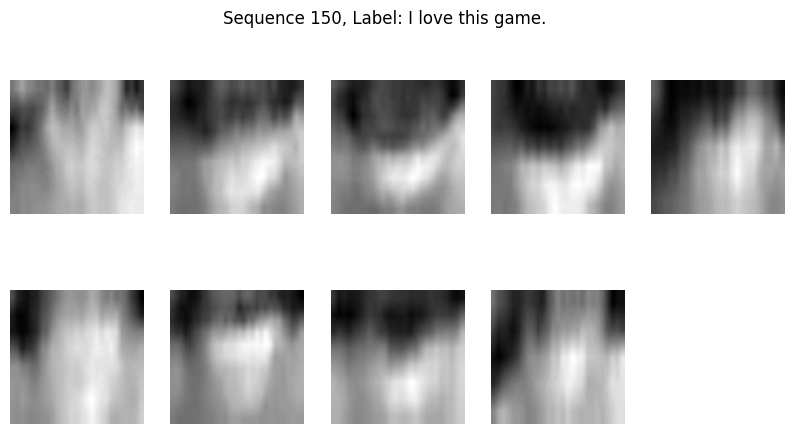

In [55]:
sequence_index = 150
frames = X[sequence_index]

plt.figure(figsize=(10, 5))
for i, frame in enumerate(frames[:10]):  # Show first 10 frames
    plt.subplot(2, 5, i + 1)
    plt.imshow(frame, cmap="gray")
    plt.axis("off")
plt.suptitle(f"Sequence {sequence_index}, Label: {y[sequence_index]}")
plt.show()


First sequence length: 10
First label: Hegin


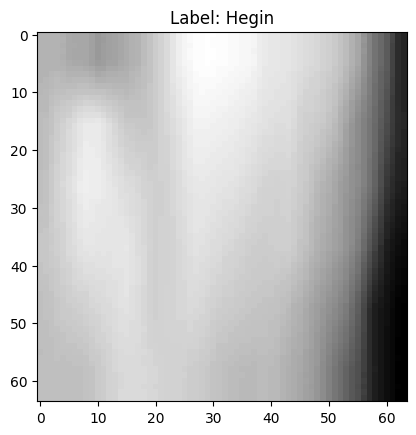

In [56]:
# Check the first sequence and its label
print("First sequence length:", len(X[0]))
print("First label:", y[0])

# Check a specific image in the sequence
import matplotlib.pyplot as plt

plt.imshow(X[0][0], cmap='gray')  # Display the first image of the first sequence
plt.title(f"Label: {y[0]}")
plt.show()


In [73]:
from tensorflow.keras import layers, models

def create_model(input_shape, num_classes):
    model = models.Sequential()

    # 3D convolution to process sequences of frames
    model.add(layers.Conv3D(32, (3, 3, 3), activation='relu', input_shape=input_shape))  # Conv3D layer for time-series of images
    model.add(layers.MaxPooling3D((2, 2, 2)))
    model.add(layers.Conv3D(64, (3, 3, 3), activation='relu'))
    model.add(layers.MaxPooling3D((2, 2, 2)))

    # Flatten the 3D output to feed into dense layers
    model.add(layers.Flatten())
    
    # Fully connected layer
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer with softmax

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [74]:
# Ensure that X_padded has the correct shape (num_samples, 27, 64, 64, 1)
X_padded = np.expand_dims(X_padded, axis=-1)  # Add channel dimension if missing
print(X_padded.shape)  # Check the shape, should be (num_samples, 27, 64, 64, 1)


(3000, 27, 64, 64, 1, 1, 1)


In [81]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assume X and y are your dataset
# X = list of sequences (e.g., shape: (num_samples, sequence_length, 64, 64))
# y = list of labels

# Find the maximum sequence length (number of frames)
max_sequence_length = max(len(seq) for seq in X)

# Pad sequences to ensure they all have the same length
X_padded = pad_sequences(X, padding='post', maxlen=max_sequence_length, dtype='float32')

# Convert y to a numpy array
y = np.array(y)

# Now X_padded is a numpy array with padded sequences, and y contains labels
X_padded = np.array(X_padded)

# Create and compile the model
model = create_model(input_shape=(max_sequence_length, 64, 64, 1), num_classes=len(WORD_LABELS))

# Train the model and store the history object
history = model.fit(X_padded, y_numeric, batch_size=32, epochs=30, validation_split=0.2)

# Access the history dictionary using the .history attribute
history_dict = history.history

# Print the loss and accuracy over epochs
print("Training Loss:", history_dict['loss'])
print("Training Accuracy:", history_dict['accuracy'])
print("Validation Loss:", history_dict['val_loss'])
print("Validation Accuracy:", history_dict['val_accuracy'])


Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 42s 529ms/step - accuracy: 0.1101 - loss: 2.3097 - val_accuracy: 0.1183 - val_loss: 2.3063
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 39s 517ms/step - accuracy: 0.1550 - loss: 2.2595 - val_accuracy: 0.1767 - val_loss: 2.2119
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 43s 570ms/step - accuracy: 0.2806 - loss: 2.0402 - val_accuracy: 0.1900 - val_loss: 2.2359
Epoch 4/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 40s 529ms/step - accuracy: 0.3874 - loss: 1.7530 - val_accuracy: 0.2700 - val_loss: 2.1953
Epoch 5/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 38s 513ms/step - accuracy: 0.4978 - loss: 1.4472 - val_accuracy: 0.2883 - val_loss: 2.3432
Epoch 6/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 39s 524ms/step - accuracy: 0.5664 - loss: 1.2069 - val_accuracy: 0.3567 - val_loss: 2.3188
Epoch 7/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 39s 516ms/step - accuracy: 0.6218 - loss: 1.0761 - val_accuracy: 0.2983 - val_loss: 2.5406
Epoch 8/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 39s 514ms/step - accuracy: 0.6590 - loss: 0.9863 - val_accu

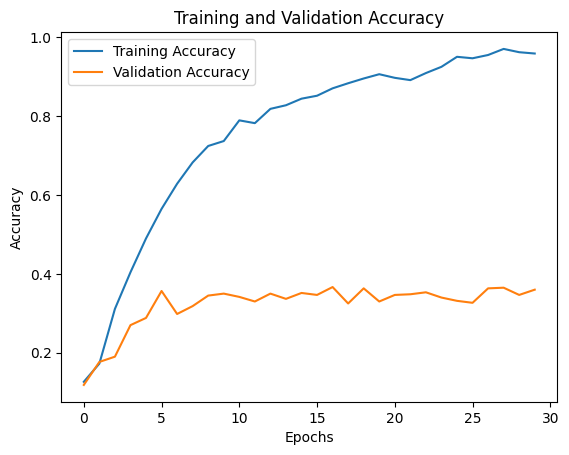

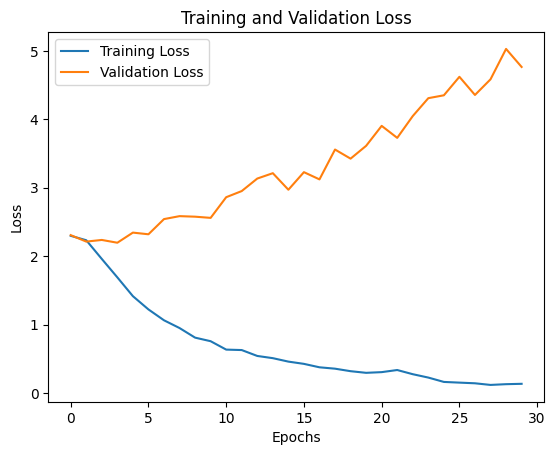

In [82]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot the training and validation loss
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()
